In [4]:
import seaborn as sns
# set style to white large readable
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 2.5})
# set color palette
sns.set_palette("colorblind")


In [5]:
import json
import scipy.stats as stats
import numpy as np

# Load the data
methods = [
    'gptj_ft_edit',
    'gptj_ike_edit',
    'gptj_rome_edit',
    'gptj_no_edit',
    'llama2_chat_ft_edit',
    'llama2_chat_ike_edit',
    'llama2_chat_rome_edit',
    'llama2_chat_no_edit'
]

model = 'gpt-3.5-turbo-0613'
analysis_data = {
    k: json.load(open(f'../results/broken_out_survey_{k}_{model}.json')) for k in methods
}
# import the rouge scores
rouge_scores = {
    k: json.load(open(f'../results/{k}_rouge.json')) for k in methods
}
# import the perplexity scores
perplexity_scores = {
    k: json.load(open(f'../results/{k}_perplexity.json')) for k in methods
}
# import the NLI scores
nli_scores = {
    k: json.load(open(f'../results/{k}_nli.json')) for k in methods
}
survey_dfs =[]
for method, sample in analysis_data.items():
    base_model = method.split('_')[0]
    for sample_id, data in sample.items():
        for label, scores in data.items():
            for score in scores:
                survey_dfs.append({
                    'label': label,
                    'score': score,
                    'intervention': method,
                    'model': base_model,
                    'sample_id': sample_id
                })
survey_df = pd.DataFrame(survey_dfs)

rouge_dfs = []
for method, sample in rouge_scores.items():
    base_model = method.split('_')[0]
    for sample_id, data in sample.items():
        for label, scores in data.items():
            for score_set in scores:
                for score_label, score in score_set.items():
                    rouge_dfs.append({
                        'label': label,
                        'score': score,
                        'intervention': method,
                        'score_label': score_label,
                        'model': base_model,
                        'sample_id': sample_id
                    })
rouge_df = pd.DataFrame(rouge_dfs)

perplexity_dfs = []
for method, sample in perplexity_scores.items():
    base_model = method.split('_')[0]
    for sample_id, data in sample.items():
        for label, scores in data.items():
            for score in scores:
                perplexity_dfs.append({
                    'label': label,
                    'score': score,
                    'intervention': method,
                    'model': base_model,
                    'sample_id': sample_id
                })
perplexity_df = pd.DataFrame(perplexity_dfs)

nli_dfs = []
for method, sample in nli_scores.items():
    base_model = method.split('_')[0]
    for sample_id, data in sample.items():
        for label, scores in data.items():
            for key, score_set in scores.items():
                for score in score_set:
                    nli_dfs.append({
                        'label': label,
                        'score': score,
                        'score_label': key,
                        'intervention': method,
                        'model': base_model,
                        'sample_id': sample_id
                    })
nli_df = pd.DataFrame(nli_dfs)



NameError: name 'pd' is not defined

In [ ]:
pvt =survey_df.pivot_table(index=['model','intervention'], columns='label', values='score', aggfunc=[np.mean, np.std])
# roung pvt to 1 decimal places and join the mean and std as strings with +- in between
pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_100_results_table.csv')
pvt

label                        cross_passage_consistency  fluency  \
model  intervention                                               
gptj   gptj_ft_edit                            4.8±2.1  4.0±2.5   
       gptj_ike_edit                           5.0±2.1  4.5±2.5   
       gptj_no_edit                            5.2±2.0  4.3±2.4   
       gptj_rome_edit                          4.7±2.0  2.7±2.2   
llama2 llama2_chat_ft_edit                     5.4±2.1  5.4±2.0   
       llama2_chat_ike_edit                    5.9±2.0  5.9±1.9   
       llama2_chat_no_edit                     5.7±2.0  5.9±1.9   
       llama2_chat_rome_edit                   5.5±2.1  5.8±2.0   

label                        main_passage_consistency main_passage_old_facts  \
model  intervention                                                            
gptj   gptj_ft_edit                           6.4±1.3                4.3±2.3   
       gptj_ike_edit                          6.4±1.4                4.3±2.5   
       gptj_no_edit                           6.4±1.3                4.6±2.3   
       gptj_rome_edit                         5.6±1.9                2.1±1.9   
llama2 llama2_chat_ft_edit                    6.0±2.0                3.2±2.6   
       llama2_chat_ike_edit                   6.4±1.6                5.2±2.3   
       llama2_chat_no_edit                    6.6±1.3                5.2±2.3   
       llama2_chat_rome_edit                  6.4±1.6                3.2±2.5   

label                        new_fact_main_passage new_fact_related_passage  \
model  intervention                                                           
gptj   gptj_ft_edit                        1.6±1.3                  3.1±1.7   
       gptj_ike_edit                       2.2±2.1                  3.4±2.0   
       gptj_no_edit                        1.4±1.2                  2.9±1.7   
       gptj_rome_edit                      3.4±2.8                  3.3±1.8   
llama2 llama2_chat_ft_edit                 5.4±2.5                  4.8±2.3   
       llama2_chat_ike_edit                3.0±2.7                  3.7±2.3   
       llama2_chat_no_edit                 1.9±1.9                  3.5±2.2   
       llama2_chat_rome_edit               4.4±2.8                  3.7±2.3   

label                        related_passage_consistency  \
model  intervention                                        
gptj   gptj_ft_edit                              5.8±2.0   
       gptj_ike_edit                             5.9±1.9   
       gptj_no_edit                              6.0±1.8   
       gptj_rome_edit                            5.8±2.1   
llama2 llama2_chat_ft_edit                       6.2±1.9   
       llama2_chat_ike_edit                      6.4±1.6   
       llama2_chat_no_edit                       6.2±1.8   
       llama2_chat_rome_edit                     6.2±1.8   

label                        related_passage_old_facts topicality  
model  intervention                                                
gptj   gptj_ft_edit                            3.1±2.5    4.2±2.6  
       gptj_ike_edit                           3.4±2.4    4.5±2.5  
       gptj_no_edit                            3.4±2.4    4.7±2.5  
       gptj_rome_edit                          2.5±2.2    3.4±2.6  
llama2 llama2_chat_ft_edit                     3.7±2.5    5.6±2.1  
       llama2_chat_ike_edit                    4.7±2.4    6.1±1.8  
       llama2_chat_no_edit                     5.1±2.2    6.0±1.9  
       llama2_chat_rome_edit                   3.8±2.5    5.9±2.0

In [ ]:
# merge all the other dataframes into one and create table like above
pvt = perplexity_df.pivot_table(index=['model','intervention'], columns='label', values='score', aggfunc=[np.mean, np.std])
pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_100_perplexity_table.csv')
pvt

label                        main_passage related_passage
model  intervention                                      
gptj   gptj_ft_edit              13.1±2.9        13.0±3.7
       gptj_ike_edit             13.0±3.5        13.0±4.7
       gptj_no_edit              12.5±3.6        13.0±2.9
       gptj_rome_edit            15.9±8.1        14.7±5.7
llama2 llama2_chat_ft_edit     24.3±148.8         8.3±3.9
       llama2_chat_ike_edit       6.2±1.3         5.8±1.0
       llama2_chat_no_edit        5.9±1.0         5.7±1.1
       llama2_chat_rome_edit      7.6±3.0         6.6±2.6

In [ ]:
pvt = nli_df.pivot_table(index=['model','intervention'], columns=['score_label','label'], values='score', aggfunc=[np.sum, np.std])
pvt = pvt.round(1).astype(str)
pvt = pvt['sum'] + '±' + pvt['std']
pvt.to_csv('../results/survey_100_nli_table.csv')
pvt

score_label                                  contradiction  \
label                        ground_truth_and_main_passage   
model  intervention                                          
gptj   gptj_ft_edit                              786.2±0.4   
       gptj_ike_edit                             758.3±0.4   
       gptj_no_edit                              950.4±0.4   
       gptj_rome_edit                           1133.0±0.4   
llama2 llama2_chat_ft_edit                       477.1±0.4   
       llama2_chat_ike_edit                      445.9±0.4   
       llama2_chat_no_edit                       411.4±0.4   
       llama2_chat_rome_edit                     667.5±0.5   

score_label                                                    \
label                        ground_truth_and_related_passage   
model  intervention                                             
gptj   gptj_ft_edit                                 795.5±0.3   
       gptj_ike_edit                                642.2±0.3   
       gptj_no_edit                                 583.0±0.3   
       gptj_rome_edit                               897.7±0.4   
llama2 llama2_chat_ft_edit                          349.3±0.4   
       llama2_chat_ike_edit                         200.1±0.3   
       llama2_chat_no_edit                          178.7±0.3   
       llama2_chat_rome_edit                        337.5±0.4   

score_label                                                    \
label                        main_passage_and_related_passage   
model  intervention                                             
gptj   gptj_ft_edit                               25763.6±0.3   
       gptj_ike_edit                              21638.5±0.3   
       gptj_no_edit                               21471.6±0.3   
       gptj_rome_edit                             35107.0±0.4   
llama2 llama2_chat_ft_edit                         2371.4±0.3   
       llama2_chat_ike_edit                        2171.2±0.2   
       llama2_chat_no_edit                         2199.8±0.2   
       llama2_chat_rome_edit                       2909.1±0.3   

score_label                                             \
label                        new_fact_and_main_passage   
model  intervention                                      
gptj   gptj_ft_edit                          474.3±0.3   
       gptj_ike_edit                         605.1±0.4   
       gptj_no_edit                          665.9±0.4   
       gptj_rome_edit                        751.8±0.4   
llama2 llama2_chat_ft_edit                    85.3±0.2   
       llama2_chat_ike_edit                  207.6±0.3   
       llama2_chat_no_edit                   249.4±0.3   
       llama2_chat_rome_edit                 161.3±0.3   

score_label                                                \
label                        new_fact_and_related_passage   
model  intervention                                         
gptj   gptj_ft_edit                            1026.2±0.4   
       gptj_ike_edit                            985.3±0.4   
       gptj_no_edit                             738.7±0.4   
       gptj_rome_edit                           975.2±0.4   
llama2 llama2_chat_ft_edit                      248.0±0.3   
       llama2_chat_ike_edit                     283.2±0.4   
       llama2_chat_no_edit                      346.1±0.4   
       llama2_chat_rome_edit                    276.4±0.3   

score_label                                             \
label                        old_fact_and_main_passage   
model  intervention                                      
gptj   gptj_ft_edit                          323.4±0.3   
       gptj_ike_edit                         414.4±0.3   
       gptj_no_edit                          428.7±0.3   
       gptj_rome_edit                        839.9±0.4   
llama2 llama2_chat_ft_edit                   172.0±0.3   
       llama2_chat_ike_edit                   89.6±0.2   
       llama2_chat_no_edit                    44.6±0

In [ ]:
pvt = rouge_df.pivot_table(index=['model','intervention'], columns=['score_label','label'], values='score', aggfunc=[np.mean, np.std])
# multple by 100 to get percentage
pvt['mean'] = pvt['mean'] * 100 
pvt['std'] = pvt['std'] * 100
pvt = pvt.round(1).astype(str)
pvt = pvt['mean'] + '±' + pvt['std']
pvt.to_csv('../results/survey_100_rouge_table.csv')
pvt 

score_label                                     rouge1  \
label                        new_fact_and_main_passage   
model  intervention                                      
gptj   gptj_ft_edit                            1.9±2.5   
       gptj_ike_edit                           2.6±2.9   
       gptj_no_edit                            2.1±2.7   
       gptj_rome_edit                          2.1±3.2   
llama2 llama2_chat_ft_edit                     2.9±4.1   
       llama2_chat_ike_edit                    2.3±1.1   
       llama2_chat_no_edit                     2.2±1.1   
       llama2_chat_rome_edit                   2.6±1.5   

score_label                                                \
label                        new_fact_and_related_passage   
model  intervention                                         
gptj   gptj_ft_edit                               1.0±1.9   
       gptj_ike_edit                              1.3±1.4   
       gptj_no_edit                               0.9±1.5   
       gptj_rome_edit                             1.0±1.9   
llama2 llama2_chat_ft_edit                        2.3±3.6   
       llama2_chat_ike_edit                       2.4±1.2   
       llama2_chat_no_edit                        2.1±1.2   
       llama2_chat_rome_edit                      2.0±1.2   

score_label                                             \
label                        old_fact_and_main_passage   
model  intervention                                      
gptj   gptj_ft_edit                            1.9±2.5   
       gptj_ike_edit                           2.6±2.9   
       gptj_no_edit                            2.1±2.7   
       gptj_rome_edit                          2.1±3.2   
llama2 llama2_chat_ft_edit                     2.9±4.1   
       llama2_chat_ike_edit                    2.3±1.1   
       llama2_chat_no_edit                     2.2±1.1   
       llama2_chat_rome_edit                   2.6±1.5   

score_label                                                \
label                        old_fact_and_related_passage   
model  intervention                                         
gptj   gptj_ft_edit                               1.0±1.9   
       gptj_ike_edit                              1.3±1.4   
       gptj_no_edit                               0.9±1.5   
       gptj_rome_edit                             1.0±1.9   
llama2 llama2_chat_ft_edit                        2.3±3.6   
       llama2_chat_ike_edit                       2.4±1.2   
       llama2_chat_no_edit                        2.1±1.2   
       llama2_chat_rome_edit                      2.0±1.2   

score_label                                                   \
label                        related_entity_and_main_passage   
model  intervention                                            
gptj   gptj_ft_edit                                  0.6±1.4   
       gptj_ike_edit                                 0.8±1.5   
       gptj_no_edit                                  0.7±1.4   
       gptj_rome_edit                                0.7±1.8   
llama2 llama2_chat_ft_edit                           1.3±1.4   
       llama2_chat_ike_edit                          1.4±1.0   
       llama2_chat_no_edit                           1.5±1.3   
       llama2_chat_rome_edit                         1.6±1.5   

score_label                                                      \
label                        related_entity_and_related_passage   
model  intervention                                               
gptj   gptj_ft_edit                                     1.2±3.0   
       gptj_ike_edit                                    1.3±1.7   
       gptj_no_edit                                     0.9±1.0   
       gptj_rome_edit                                   1.2±1.8   
llama2 llama2_chat_ft_edit                              1.8±1.9   
       llama2_chat_ike_edit                             1.7±1.1   
       llama2_chat_no_edit                              1.4±0.9   
   

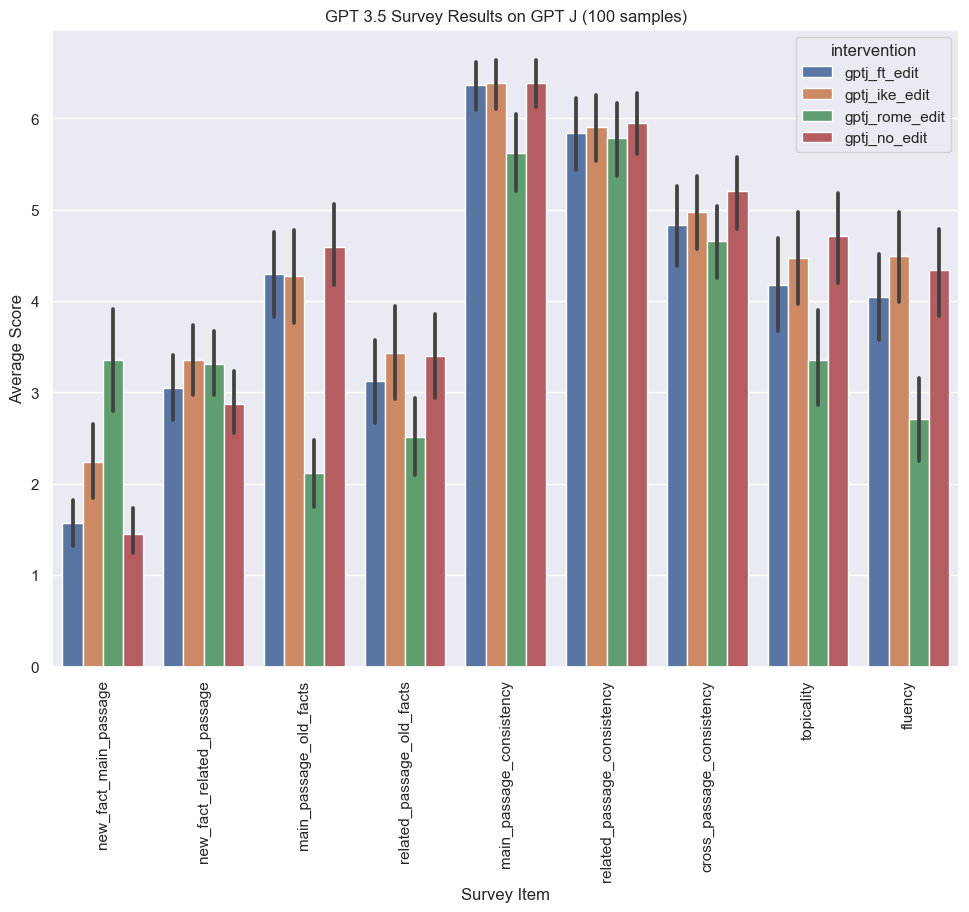

In [ ]:
# bar plot with two dicts of str, list
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plot 
plot_dfs = survey_df.loc[
    (survey_df['model'] == 'gptj') 
]

plot_df = pd.DataFrame(plot_dfs)

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('GPT 3.5 Survey Results on GPT J (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot 
fig = ax.get_figure()
fig.savefig('../results/survey_results_gpt3.5_gptj_interventions.png', dpi=300, bbox_inches='tight')

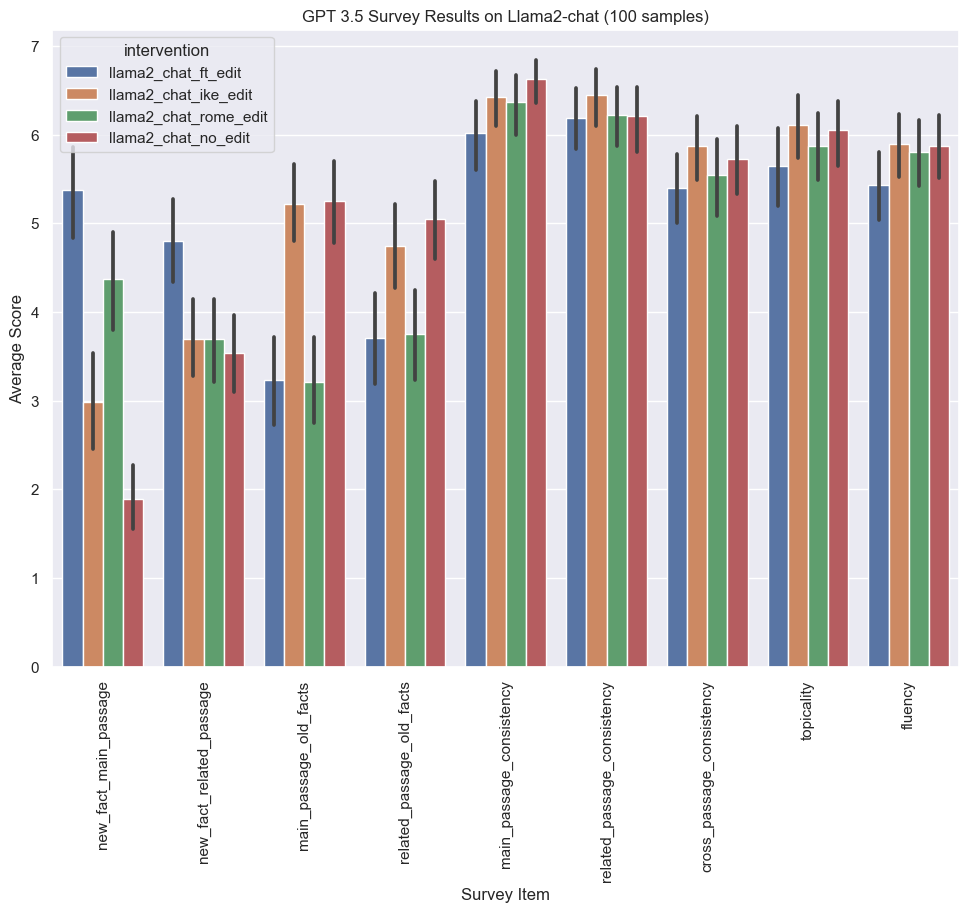

In [ ]:
# bar plot with two dicts of str, list
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# plot 
plot_dfs = survey_df.loc[
    (survey_df['model'] == 'llama2') 
]


plot_df = pd.DataFrame(plot_dfs)

# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('GPT 3.5 Survey Results on Llama2-chat (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot 
fig = ax.get_figure()
fig.savefig('../results/survey_results_gpt3.5_llama2_chat_interventions.png', dpi=300, bbox_inches='tight')

In [ ]:
# perform pairwise mann whitney u tests on edit vs no edit
from scipy import stats

no_edit_gptj = analysis_data['gptj_no_edit']
#no_edit_llama2 = analysis_data['llama2_chat_no_edit']
for method, samples in analysis_data.items():
    if 'no_edit' in method:
        continue
    if 'gptj' in method:
        no_edit = no_edit_gptj
    else:
        #no_edit = no_edit_llama2
        continue
    print(method)
    for label in list(analysis_data['gptj_no_edit'].values())[0].keys():
        scores = [samp[label][0] for samp in samples.values()]
        scores = [score for score in scores if score is not None]
        no_edit_label = [samp[label][0] for samp in no_edit.values()]
        # filter none videos
        no_edit_label = [score for score in no_edit_label if score is not None]
        
        stat = stats.mannwhitneyu(no_edit_label, scores, alternative='two-sided')
        if stat.pvalue < 0.05:
            
            print(label)
            print("Significant")
            print("Two-sided", stats.mannwhitneyu(no_edit_label, scores, alternative='two-sided'))
            print("Less", stats.mannwhitneyu(no_edit_label, scores, alternative='less'))
            print("Greater", stats.mannwhitneyu(no_edit_label, scores, alternative='greater'))
            print('\n')

gptj_ft_edit
gptj_ike_edit
new_fact_main_passage
Significant
Two-sided MannwhitneyuResult(statistic=3747.5, pvalue=0.00020344778452074022)
Less MannwhitneyuResult(statistic=3747.5, pvalue=0.00010172389226037011)
Greater MannwhitneyuResult(statistic=3747.5, pvalue=0.9998994630488326)


gptj_rome_edit
new_fact_main_passage
Significant
Two-sided MannwhitneyuResult(statistic=2958.5, pvalue=5.9246200344413275e-08)
Less MannwhitneyuResult(statistic=2958.5, pvalue=2.9623100172206638e-08)
Greater MannwhitneyuResult(statistic=2958.5, pvalue=0.9999999708610448)


main_passage_old_facts
Significant
Two-sided MannwhitneyuResult(statistic=7353.0, pvalue=1.0733283915080545e-12)
Less MannwhitneyuResult(statistic=7353.0, pvalue=0.9999999999994738)
Greater MannwhitneyuResult(statistic=7353.0, pvalue=5.366641957540272e-13)


related_passage_old_facts
Significant
Two-sided MannwhitneyuResult(statistic=5815.5, pvalue=0.0026607777714977112)
Less MannwhitneyuResult(statistic=5815.5, pvalue=0.998681373843828

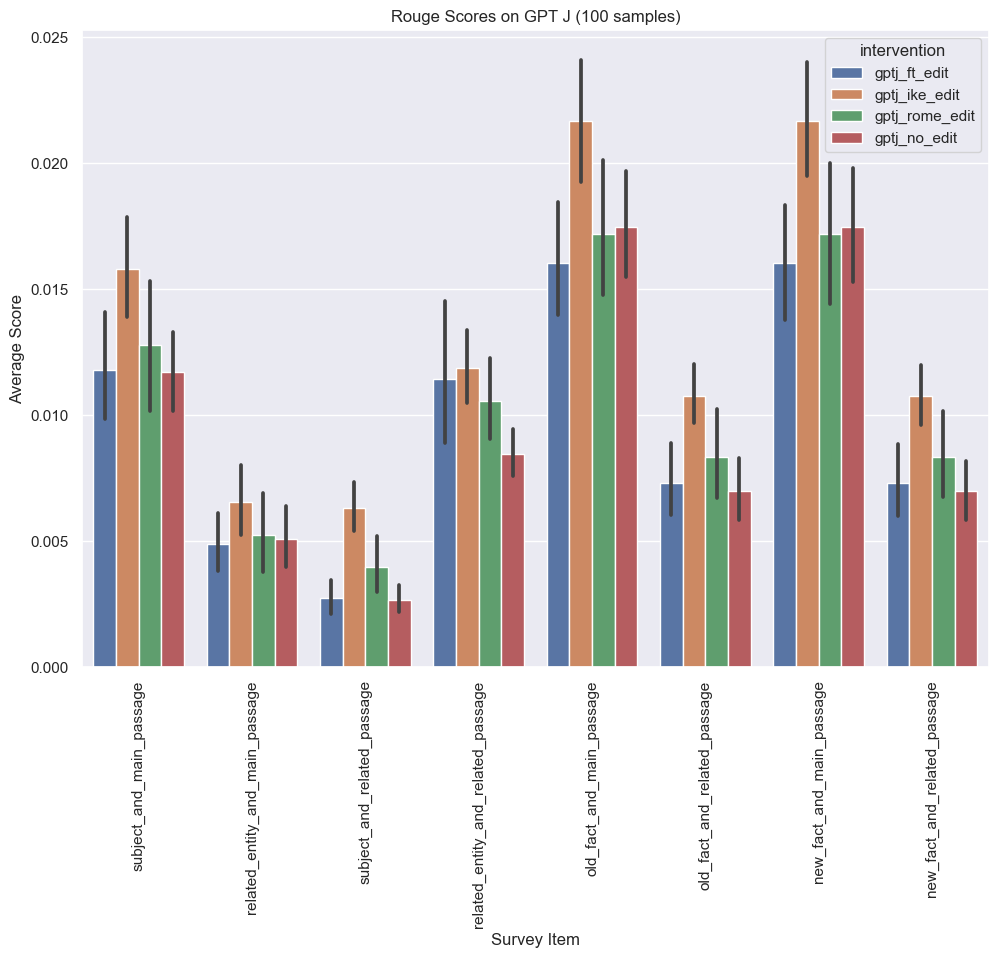

In [ ]:
# mean and std of rouge scores
import numpy as np

rouge_plot_df = rouge_df.loc[
    (rouge_df['model'] == 'gptj') 
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=rouge_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Rouge Scores on GPT J (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_gptj_rouge_scores.png', dpi=300, bbox_inches='tight')


In [6]:
# mean and std of rouge scores
import numpy as np
rouge_plot_df = rouge_df.loc[
    (rouge_df['model'] == 'llama2') 
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=rouge_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Rouge Scores on Llama2-chat (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_llama2_rouge_scores.png', dpi=300, bbox_inches='tight')


NameError: name 'rouge_df' is not defined

In [7]:
perplexity_plot_df = perplexity_df.loc[
    (perplexity_df['model'] == 'gptj') 
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=perplexity_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Perplexity Scores (gpt2-xl) on GPT J (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_gptj_perplexity_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'perplexity_df' is not defined

In [8]:
perplexity_plot_df = perplexity_df.loc[
    (perplexity_df['model'] == 'llama2') 
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=perplexity_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Perplexity Scores (gpt2-xl) on Llama2 (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_llama2_perplexity_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'perplexity_df' is not defined

In [9]:
import numpy as np

nli_plot_df = nli_df.loc[
    (nli_df['model'] == 'gptj')  &
    (nli_df['score_label'] == 'contradiction')
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=nli_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Contradiction Scores on GPT J (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_gptj_contradiction_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'nli_df' is not defined

In [10]:
nli_plot_df = nli_df.loc[
    (nli_df['model'] == 'llama2')  &
    (nli_df['score_label'] == 'contradiction')
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=nli_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Contradiction Scores on Llama2 (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_llama2_contradiction_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'nli_df' is not defined

In [11]:
nli_plot_df = nli_df.loc[
    (nli_df['model'] == 'llama2')  &
    (nli_df['score_label'] == 'entailment')
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=nli_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Entailment Scores on Llama2 (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_llama2_entailment_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'nli_df' is not defined

In [12]:
nli_plot_df = nli_df.loc[
    (nli_df['model'] == 'llama2')  &
    (nli_df['score_label'] == 'entailment') &
    # doesnt contain ground_truth string in label
    (nli_df['label'].str.contains('ground_truth') == False)
]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='label', y='score', hue='intervention', data=nli_plot_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Entailment Scores on Llama2 (100 samples)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/100_llama2_entailment_scores.png', dpi=300, bbox_inches='tight')

NameError: name 'nli_df' is not defined

In [13]:

correlations = []

# for score_label in rouge_df.score_label.unique():
    #for intervention in methods:
topicality = survey_df.loc[
    (survey_df['label'] == 'topicality') 
    #(survey_df['score_label'] == score_label) & 
    #(survey_df['intervention'] == intervention)
]
rouge = rouge_df#.loc[
    #(rouge_df['score_label'] == score_label) &
    #(rouge_df['label'] == label) 
    #(rouge_df['intervention'] == intervention)
#]
# agg on sample id
rouge = rouge.groupby(['intervention', 'sample_id']).mean().reset_index()
# merge on sample id
topicality = topicality.merge(rouge, on=['intervention', 'sample_id'])
correlations.append(
    {
        #'label': label,
        #'score_label': score_label,
        # 'intervention': intervention,
        'corr': topicality.corr(method='spearman')['score_x']['score_y']
    }
)

# print top 3 positive and negative correlations
correlations_df = pd.DataFrame(correlations)
correlations_df = correlations_df.sort_values(by=['corr'])
correlations_df


NameError: name 'survey_df' is not defined

In [14]:

correlations = []
#for label in perplexity_df.label.unique():
#for intervention in methods:
fluency = survey_df.loc[
    (survey_df['label'] == 'fluency') 
    #(survey_df['intervention'] == intervention)
]
perplexity = perplexity_df #.loc[
#(perplexity_df['label'] == label) 
    # (perplexity_df['intervention'] == intervention)
#]
# merge on sample id
# groupby sample id and take mean
perplexity = perplexity.groupby(['intervention', 'sample_id']).mean().reset_index()
fluency = fluency.merge(perplexity, on=['intervention', 'sample_id'])
correlations.append(
    {
        #'label': label,
        #'intervention': intervention,
        'corr': fluency.corr(method='spearman')['score_x']['score_y']
    }
)

# print top 3 positive and negative correlations
correlations_df = pd.DataFrame(correlations)
correlations_df = correlations_df.sort_values(by=['corr'])
correlations_df
# check also meaning or summing

NameError: name 'survey_df' is not defined

In [15]:
nli_map = {
    'new_fact_main_passage': 'new_fact_and_main_passage',
    'new_fact_related_passage': 'new_fact_and_related_passage',
    'main_passage_old_facts': 'ground_truth_and_main_passage', 
    'related_passage_old_facts': 'ground_truth_and_related_passage',
    'cross_passage_consistency': 'main_passage_and_related_passage'
}
nli_df.label.unique()
# create a reverse map
nli_map_reverse = {v: k for k, v in nli_map.items()}

correlations = []

for label in nli_df.label.unique():
    if label not in nli_map_reverse:
        continue
    for score_label in nli_df.score_label.unique():
        #for intervention in methods:
            surv = survey_df.loc[
                (survey_df['label'] == 
                    nli_map_reverse[label]) &
                (survey_df['model'] != 'gptj') 
            ]
            nli = nli_df.loc[
                (nli_df['score_label'] == score_label) &
                (nli_df['label'] == label) &
                (nli_df['model'] != 'gptj') 
                #(nli_df['intervention'] == intervention)
            ]
            nli = nli.groupby(['intervention', 'sample_id']).sum().reset_index()
            
            # merge on sample id
            nli = surv.merge(nli, on=['intervention', 'sample_id'])
            correlations.append(
                {
                    'label': nli_map_reverse[label],
                    'score_label': score_label,
                    #'intervention': intervention,
                    'corr': nli.corr(method='spearman')['score_x']['score_y']
                }
            )
# print top 3 positive and negative correlations
correlations_df = pd.DataFrame(correlations)
correlations_df = correlations_df.sort_values(by=['corr'])
correlations_df

NameError: name 'nli_df' is not defined

In [21]:
# Pretest results

# open ../data/pretest_survey_samples_true_order.csv
with open('../data/survey_samples/pretest_survey_samples_true_order.csv', 'r') as f:
    pretest_samples = f.readlines()

likert_7_scale = {
    '1': 'Strongly Disagree',
    '2': 'Disagree',
    '3': 'Somewhat Disagree',
    '4': 'Neither Agree nor Disagree',
    '5': 'Somewhat Agree',
    '6': 'Agree',
    '7': 'Strongly Agree'
}
# reverse the likert scale
reverse_likert_7_scale = {
    v: int(k) for k, v in likert_7_scale.items()
}
# open '../results/pretest_responses.csv'
# and create a dict of sample_id: response
pretest_responses = []
with open('../results/pretest_responses.tsv', 'r') as f:
    columns = []
    lines = f.readlines()
    columns = lines[0].split('\t')
    # columns 1 to 9 are the questions
    questions = columns[1:10]
    print(questions)
    first_question = questions[0]

    # break lines[1:] into 9 chunks
    # each chunk is a participant

    # chunks = [lines[1].split('\t')[i:i + 9] for i in range(1, len(lines[1].split('\t')), 9)]
    # for i, chunk in enumerate(chunks):
    #     for j, response in enumerate(chunk):
    #         print(
    #             questions[j % 9],
    #             response
    #         )

    for i, line in enumerate(lines[1:]):
        
        participant_id = i
        sample_id = pretest_samples[0]
        for j, response in enumerate(line.split('\t')):
            if j == 0:
                continue
            method, samp_id = sample_id.replace(
                'no_edit', 'noedit'
            ).split('_')
            pretest_responses.append(
                {
                    'participant_id': participant_id,
                    'sample_id': samp_id.strip(),
                    'method': method.strip().replace(
                        'noedit', 'no_edit'
                    ),
                    'question': questions[(j % 9) - 1].replace('[Answer]', '').strip(),
                    'response': reverse_likert_7_scale[response.strip()]
                }
            )
            if j % 9 == 0:
                if j // 9 < len(pretest_samples):
                    sample_id = pretest_samples[(j // 9)]


pretest_df = pd.DataFrame(pretest_responses)
pretest_df.to_csv('../results/pretest_responses_pd.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/survey_samples/pretest_survey_samples_true_order.csv'

In [17]:
# plot bargraph method vs average response

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='question', y='response', hue='method', data=pretest_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Pretest Results (n=20, 2 participants)')
ax.set_xlabel('Survey Item')
ax.set_ylabel('Average Score')

# save plot 
fig = ax.get_figure()
fig.savefig('../results/pretest_results.png', dpi=300, bbox_inches='tight')


NameError: name 'pretest_df' is not defined

In [22]:
label_to_question = {
    'new_fact_main_passage': 'The main passage is written as if the new fact is true', 
    'new_fact_related_passage': 'The related passage does not contradict the new fact',
    'main_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the main passage.', 
    'related_passage_old_facts': 'Ignoring the new fact, most of the old facts are still true in the related passage.',
    'main_passage_consistency': 'Ignoring the old and new facts, the main passage does not contradict itself.', 
    'related_passage_consistency': 'Ignoring the old and new facts, the related passage does not contradict itself.',
    'cross_passage_consistency':'Ignoring the old and new facts, the main passage and the related passage do not contradict each other.', 
    'topicality': 'The main passage is focused on the subject and the related passage is focused on the related entity',
    'fluency': 'Both passages are natural sounding text close to what a human would write.'
}
question_to_label = {
    v: k for k, v in label_to_question.items()
}

In [23]:
surv_test

NameError: name 'surv_test' is not defined

In [24]:
# concat survey where the sample_id is in the pretest_df
# is in llama2_chat_no_edit, llama2_chat_rome
surv_test = survey_df.loc[
    survey_df['sample_id'].isin(pretest_df['sample_id'].unique()) &
    (survey_df['intervention'].isin([
        'llama2_chat_no_edit',
        'llama2_chat_rome_edit'
    ]))
]
surv_test.label.unique()
# rename llama2_chat_no_edit to no_edity
surv_test['method'] = surv_test['intervention'].apply(
    lambda x: x.replace('llama2_chat_no_edit', 'no_edit')
)
# rename llama2_chat_rome_edit to rome
surv_test['method'] = surv_test['method'].apply(
    lambda x: x.replace('llama2_chat_rome_edit', 'rome')
)
# map the label to the question
surv_test['question'] = surv_test['label'].apply(
    lambda x: label_to_question[x]
)


# correlate the survey with the pretest
# join on question, method, sample_id, participant_id = 0
# .corr(method='spearman')['score_x']['score_y']

joined_df = surv_test.merge(
    #pretest_df.loc[
    #    pretest_df['participant_id'] == 0
    #],
    pretest_df,
    #pretest_df.groupby(['question', 'method', 'sample_id']).mean().reset_index(),
    # on=['sample_id', 'method', 'question']
).dropna()

NameError: name 'survey_df' is not defined

In [25]:
joined_df.corr(method='kendall')['score']['response']

NameError: name 'joined_df' is not defined

In [26]:
pretest_df[
        ['question', 'response']
    ]

NameError: name 'pretest_df' is not defined

In [27]:
# correlation between participants responses
participant_1 = pretest_df.loc[
    (pretest_df['participant_id'] == 0)
]['response'].values
participant_2 = pretest_df.loc[
    (pretest_df['participant_id'] == 1)
]['response'].values


#stats.spearmanr(participant_1, participant_2)
# absolute agreement
np.sum(participant_1 == participant_2) / len(participant_1)
# agreement within 3 points
np.sum(np.abs(participant_1 - participant_2) <= 2) / len(participant_1)



NameError: name 'pretest_df' is not defined

In [28]:
# krippendorff alpha for inter-rater agreement: Interval
def nominal_metric(a, b):
    return a != b


def interval_metric(a, b):
    return (a-b)**2


def ratio_metric(a, b):
    return ((a-b)/(a+b))**2


def krippendorff_alpha(data, metric=interval_metric, force_vecmath=False, convert_items=float, missing_items=None):
    '''
    Calculate Krippendorff's alpha (inter-rater reliability):
    
    data is in the format
    [
        {unit1:value, unit2:value, ...},  # coder 1
        {unit1:value, unit3:value, ...},   # coder 2
        ...                            # more coders
    ]
    or 
    it is a sequence of (masked) sequences (list, numpy.array, numpy.ma.array, e.g.) with rows corresponding to coders and columns to items
    
    metric: function calculating the pairwise distance
    force_vecmath: force vector math for custom metrics (numpy required)
    convert_items: function for the type conversion of items (default: float)
    missing_items: indicator for missing items (default: None)
    '''
    
    # number of coders
    m = len(data)
    
    # set of constants identifying missing values
    if missing_items is None:
        maskitems = []
    else:
        maskitems = list(missing_items)
    if np is not None:
        maskitems.append(np.ma.masked_singleton)
    
    # convert input data to a dict of items
    units = {}
    for d in data:
        try:
            # try if d behaves as a dict
            diter = d.items()
        except AttributeError:
            # sequence assumed for d
            diter = enumerate(d)
            
        for it, g in diter:
            if g not in maskitems:
                try:
                    its = units[it]
                except KeyError:
                    its = []
                    units[it] = its
                its.append(convert_items(g))


    units = dict((it, d) for it, d in units.items() if len(d) > 1)  # units with pairable values
    n = sum(len(pv) for pv in units.values())  # number of pairable values
    
    if n == 0:
        raise ValueError("No items to compare.")
    
    np_metric = (np is not None) and ((metric in (interval_metric, nominal_metric, ratio_metric)) or force_vecmath)
    
    Do = 0.
    for grades in units.values():
        if np_metric:
            gr = np.asarray(grades)
            Du = sum(np.sum(metric(gr, gri)) for gri in gr)
        else:
            Du = sum(metric(gi, gj) for gi in grades for gj in grades)
        Do += Du/float(len(grades)-1)
    Do /= float(n)

    if Do == 0:
        return 1.

    De = 0.
    for g1 in units.values():
        if np_metric:
            d1 = np.asarray(g1)
            for g2 in units.values():
                De += sum(np.sum(metric(d1, gj)) for gj in g2)
        else:
            for g2 in units.values():
                De += sum(metric(gi, gj) for gi in g1 for gj in g2)
    De /= float(n*(n-1))

    return 1.-Do/De if (Do and De) else 1.

krippendorff_alpha(
    np.array([
       np.array(joined_df['response']),
       np.array(joined_df['score'])
    ])
)

NameError: name 'joined_df' is not defined

In [29]:
lst = np.array(joined_df['score']) - np.array(joined_df['response'])
# count number of lst items that are between 1
np.sum(np.abs(joined_df['score'] - np.array(joined_df['response']) <= 3)) / len(joined_df)

NameError: name 'joined_df' is not defined

In [30]:
len(joined_df['response'])

NameError: name 'joined_df' is not defined

In [31]:
# question with the most disagreement between participants
# for each question, calculate the difference between the two participants

question_diffs = []
for question in pretest_df.question.unique():
    
    question_diffs.append(
        {
            'question': question,
            'diff': np.sum(np.abs(pretest_df.loc[
                    (pretest_df['question'] == question) &
                    (pretest_df['participant_id'] == 0)
                ]['response'] - pretest_df.loc[
                    (pretest_df['question'] == question) &
                    (pretest_df['participant_id'] == 1)
                ]['response'].values) >= 3)
        }
    )

print(question_diffs)

NameError: name 'pretest_df' is not defined

In [32]:
# calculate diffs per sample_id

sample_diffs = []

for sample_id in pretest_df.sample_id.unique():

    sample_diffs.append(
        {
            'sample_id': sample_id,
            'diff': np.sum(np.abs(pretest_df.loc[
                    (pretest_df['sample_id'] == sample_id) &
                    (pretest_df['participant_id'] == 0)
                ]['response'] - pretest_df.loc[
                    (pretest_df['sample_id'] == sample_id) &
                    (pretest_df['participant_id'] == 1)
                ]['response'].values) > 3)
        }
    )
print(sample_diffs)

NameError: name 'pretest_df' is not defined

In [34]:
# Pretest results
import pandas as pd

# group 2, group 3, group 4
with open('../data/survey_samples/pilot_survey_samples_group2_order1_true_order.csv', 'r') as f:
    group_2_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group3_order1_true_order.csv', 'r') as f:
    group_3_order_1 = f.readlines()
with open('../data/survey_samples/pilot_survey_samples_group4_order1_true_order.csv', 'r') as f:
    group_4_order_1 = f.readlines()

likert_7_scale = {
    '1': 'Strongly Disagree',
    '2': 'Disagree',
    '3': 'Somewhat Disagree',
    '4': 'Neither Agree nor Disagree',
    '5': 'Somewhat Agree',
    '6': 'Agree',
    '7': 'Strongly Agree'
}
# reverse the likert scale
reverse_likert_7_scale = {
    v: int(k) for k, v in likert_7_scale.items()
}
# ../results/AI Text Generation Fact Changing Survey (Group 2 Order 1) (Responses) - Form Responses 1.tsv
def _merge_responses_with_true_order(
    filename,
    true_order
):
    responses = []
    with open(filename, 'r') as f:
        columns = []
        lines = f.readlines()
        columns = lines[0].split('\t')
        # columns 1 to 9 are the questions
        questions = columns[1:10]
        first_question = questions[0]
        for i, line in enumerate(lines[1:]):
            participant_id = i
            sample_id = true_order[0]
            for j, response in enumerate(line.split('\t')):
                if j == 0:
                    continue
                method, samp_id = sample_id.replace(
                    'no_edit', 'noedit'
                ).split('_')
                responses.append(
                    {
                        'participant_id': participant_id,
                        'sample_id': samp_id.strip(),
                        'method': method.strip().replace(
                            'noedit', 'no_edit'
                        ),
                        'question': questions[(j % 9) - 1].replace('[Answer]', '').strip(),
                        'response': reverse_likert_7_scale[response.strip()]
                    }
                )
                if j % 9 == 0:
                    if j // 9 < len(true_order):
                        sample_id = true_order[(j // 9)]
    return responses

group_2_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 2 Order 1) (Responses) - Form Responses 1.tsv',
    group_2_order_1
)
group_2_order_1_df = pd.DataFrame(group_2_order_1_responses)
group_3_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 3 Order 1) (Responses) - Form Responses 1.tsv',
    group_3_order_1
)
group_3_order_1_df = pd.DataFrame(group_3_order_1_responses)
group_4_order_1_responses = _merge_responses_with_true_order(
    '../results/AI Text Generation Fact Changing Survey (Group 4 Order 1) (Responses) - Form Responses 1.tsv',
    group_4_order_1
)
group_4_order_1_df = pd.DataFrame(group_4_order_1_responses)

responses_df = pd.concat(
    [
        group_2_order_1_df,
        group_3_order_1_df,
        group_4_order_1_df
    ]
)

In [35]:
len(responses_df) / 9

27.0

In [36]:
len(responses_df)

243

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_58927/1661929520.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


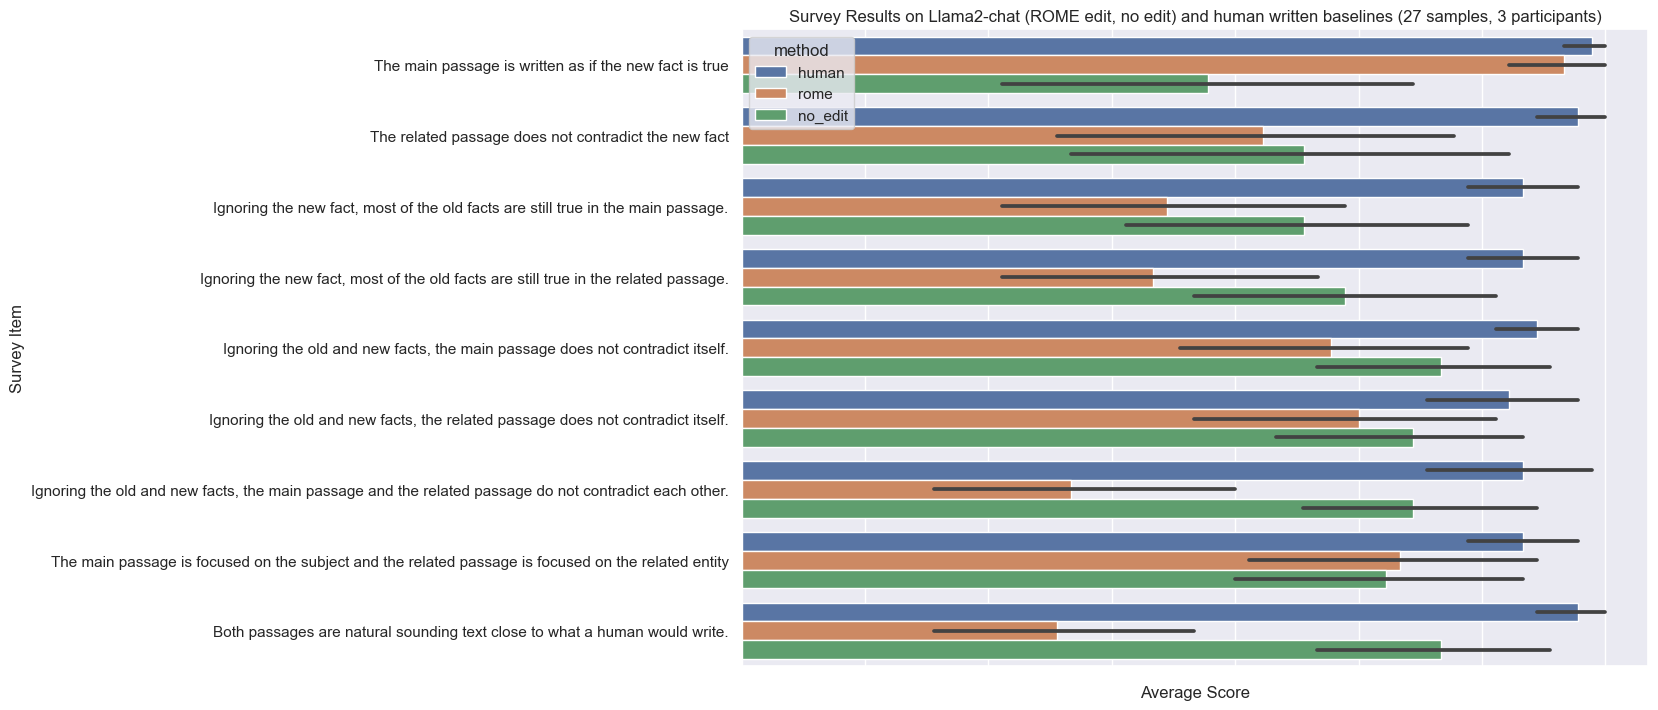

In [37]:
# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='response', y='question', hue='method', data=responses_df, orient = 'h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Survey Results on Llama2-chat (ROME edit, no edit) and human written baselines (27 samples, 3 participants)')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_results_pilot.png', dpi=300, bbox_inches='tight')

In [38]:
responses_df.sample_id.unique()

array(['60b37610ad951b89a8123101512f3520',
       'e16852ef3f0165615e93de4ca793430a',
       'a41ba08ffb8af6eb5ecf70c7a52a6289',
       'ed7e1c4359063598dbeb73d4da2869c1',
       '0a1d0bbec0b94708c01dfb2d8d6161bb',
       'ad41a34db7e3975d6b83d2ddedb19d9f',
       '49b1579016eb2228e0593380d1a1366a',
       '0b65acc415a69a2c25061b239d7925aa',
       '94404544b0b793406c670af7b8d81328'], dtype=object)

In [48]:
# open and correlate scores with GPT 3.5 results
rome = '../results/broken_out_survey_llama2_chat_rome_edit_pilot_survey_gpt-3.5-turbo-0613.json'
no_edit = '../results/broken_out_survey_llama2_chat_no_edit_pilot_survey_gpt-3.5-turbo-0613.json'
human = '../results/broken_out_survey_llama2_chat_human_edit_pilot_survey_gpt-3.5-turbo-0613.json'

gpt35_survey_dfs =[]
for results, method in [(human, 'human'), (rome, 'rome'), (no_edit, 'no_edit')]:
    with open(results, 'r') as f:
        data = json.load(f)
        for sample_id, sample in data.items():
            if sample_id not in responses_df.sample_id.unique():
                continue
            for label, scores in sample.items():
                for score in scores:
                    gpt35_survey_dfs.append({
                        'method': method,
                        'label': label_to_question[label],
                        'score': score,
                        'intervention': results.split('/')[-1].split('_')[3],
                        'model': 'gpt-3.5-turbo-0613',
                        'sample_id': sample_id
                    })
survey_df = pd.DataFrame(gpt35_survey_dfs)

/var/folders/hk/gjvj191n5k7gzt9tg0z8s3km0000gn/T/ipykernel_58927/1527086.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


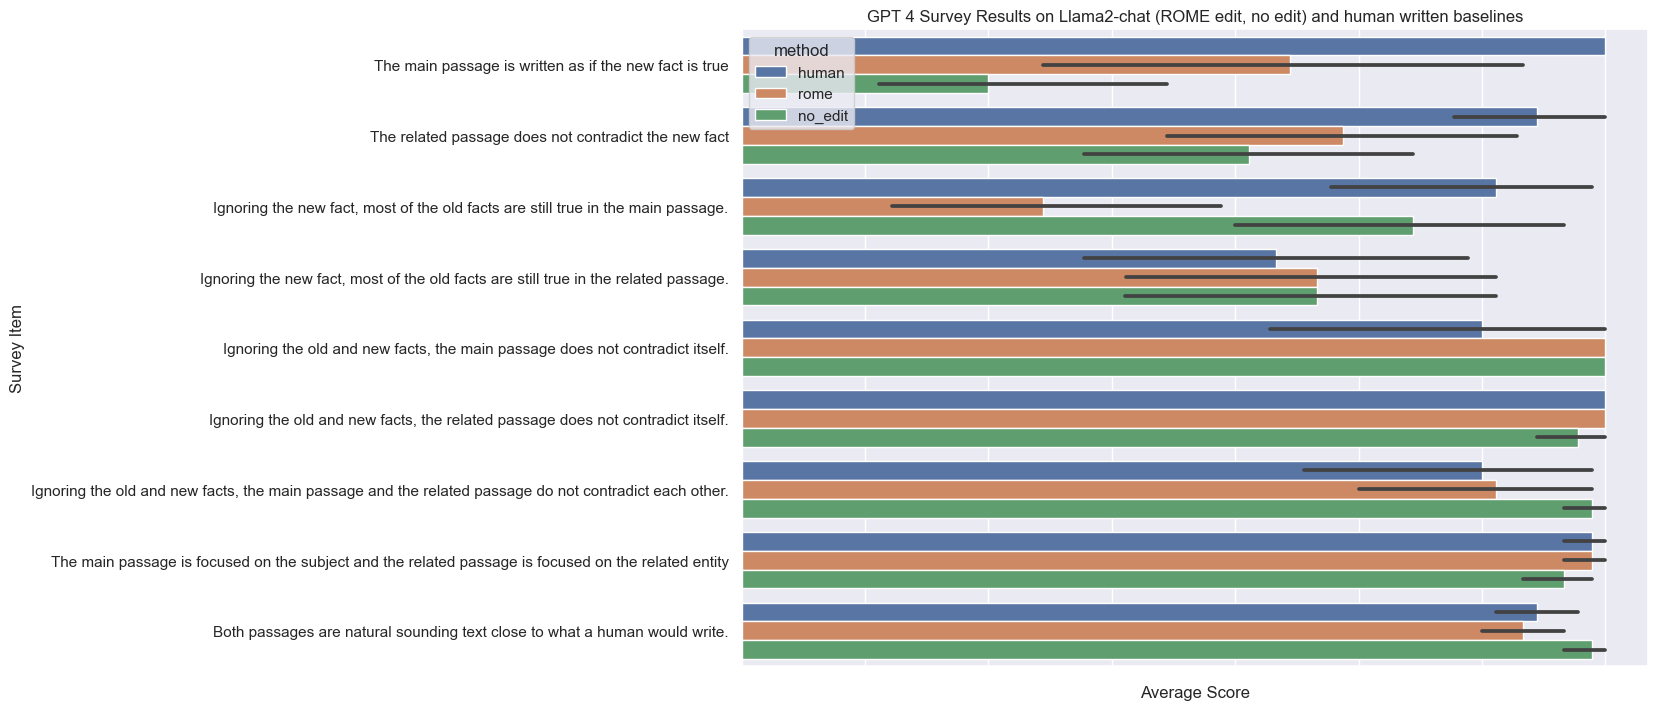

In [49]:
# increase size of plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='score', y='label', hue='method', data=survey_df, orient = 'h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('GPT 4 Survey Results on Llama2-chat (ROME edit, no edit) and human written baselines')
ax.set_ylabel('Survey Item')
ax.set_xlabel('Average Score')

# save plot
fig = ax.get_figure()
fig.savefig('../results/survey_results_pilot_gpt4.png', dpi=300, bbox_inches='tight')

In [50]:
responses_df.columns

Index(['participant_id', 'sample_id', 'method', 'question', 'response'], dtype='object')

In [67]:
survey_df = survey_df.rename(columns={'score': 'response', 'label': 'question'})
survey_df['participant_id'] = 2
joined_df = pd.concat(
    [
        responses_df,
        survey_df
    ]
)


KeyError: 'response_x'

In [68]:
# calculate ICC
import pingouin as pg

pg.intraclass_corr(
    data=joined_df,
    targets='question',
    raters='participant_id',
    ratings='response'
)

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.117311,1.265803,8,9,0.364246,"[-0.53, 0.69]"
1,ICC2,Single random raters,0.174599,1.502011,8,8,0.289170,"[-0.37, 0.7]"
2,ICC3,Single fixed raters,0.200643,1.502011,8,8,0.289170,"[-0.49, 0.74]"
3,ICC1k,Average raters absolute,0.209988,1.265803,8,9,0.364246,"[-2.24, 0.82]"
4,ICC2k,Average random raters,0.297291,1.502011,8,8,0.289170,"[-1.15, 0.82]"
5,ICC3k,Average fixed raters,0.334226,1.502011,8,8,0.289170,"[-1.95, 0.85]"


In [82]:
import pingouin as pg
# correlate score in survey_df and response in responses_df
# sort by method, label, and sample_id for each and then correlate score and response
sorted_survey_df = survey_df.sort_values(by=['method', 'question', 'sample_id'])
sorted_responses_df = responses_df.sort_values(by=['method', 'question', 'sample_id'])

# join on method, label, and sample_id
joined_df = sorted_survey_df.merge(
    sorted_responses_df,
    on=['method', 'question', 'sample_id']
).dropna()
# exclude the following labels 
excludes = [
    'The main passage is focused on the subject and the related passage is focused on the related entity', 
    'Both passages are natural sounding text close to what a human would write.'
]
joined_df = joined_df.loc[
    joined_df['question'].isin(excludes) == False
]
# calculate correlation by method and label
correlations = []



In [83]:
joined_df[['response_x', 'response_y']]

,response_x,response_y
9,7.0,6
10,7.0,7
11,1.0,7
12,7.0,6
13,6.0,7
...,...,...
237,4.0,1
239,7.0,7
240,7.0,6
241,7.0,5


In [87]:
for question in joined_df.question.unique():
    print(question)
    print(
        joined_df.loc[
            (joined_df['question'] == question)
        ][['response_x', 'response_y']].corr(method='kendall')
    )

Ignoring the new fact, most of the old facts are still true in the main passage.
            response_x  response_y
response_x    1.000000    0.200708
response_y    0.200708    1.000000
Ignoring the new fact, most of the old facts are still true in the related passage.
            response_x  response_y
response_x    1.000000    0.054991
response_y    0.054991    1.000000
Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
            response_x  response_y
response_x    1.000000    0.004376
response_y    0.004376    1.000000
Ignoring the old and new facts, the main passage does not contradict itself.
            response_x  response_y
response_x    1.000000   -0.304997
response_y   -0.304997    1.000000
Ignoring the old and new facts, the related passage does not contradict itself.
            response_x  response_y
response_x    1.000000    0.336282
response_y    0.336282    1.000000
The main passage is written as if the new fact is 

In [88]:
for method in joined_df.method.unique():
    for question in joined_df.question.unique():
        print(method, question)
        print(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ][['response_x', 'response_y']].corr(method='kendall'))
        # print(
        #     pg.cronbach_alpha(data=joined_df.loc[
        #             (joined_df['method'] == method) &
        #             (joined_df['question'] == question)
        #         ][['response_x', 'response_y']]
        # ))

human Ignoring the new fact, most of the old facts are still true in the main passage.
            response_x  response_y
response_x    1.000000   -0.365148
response_y   -0.365148    1.000000
human Ignoring the new fact, most of the old facts are still true in the related passage.
            response_x  response_y
response_x    1.000000    0.073324
response_y    0.073324    1.000000
human Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
            response_x  response_y
response_x    1.000000   -0.086957
response_y   -0.086957    1.000000
human Ignoring the old and new facts, the main passage does not contradict itself.
            response_x  response_y
response_x    1.000000   -0.522233
response_y   -0.522233    1.000000
human Ignoring the old and new facts, the related passage does not contradict itself.
            response_x  response_y
response_x         1.0         NaN
response_y         NaN         1.0
human The main passa

In [76]:
# calculate agreement within 1, 2, and 3 points
absolute_agreement = np.sum(joined_df['response_x'] == np.array(joined_df['response_y'])) / len(joined_df)
agreement_within_one = np.sum(np.abs(joined_df['response_x'] - np.array(joined_df['response_y']) <= 1)) / len(joined_df)
agreement_within_two = np.sum(np.abs(joined_df['response_x'] - np.array(joined_df['response_y']) <= 2)) / len(joined_df)
agreement_within_three = np.sum(np.abs(joined_df['response_x'] - np.array(joined_df['response_y']) <= 3)) / len(joined_df)


In [77]:
print(
    'Absolute Agreement: ', absolute_agreement
)
print(
    'Agreement within 1 point: ', agreement_within_one
)
print(
    'Agreement within 2 points: ', agreement_within_two
)
print(
    'Agreement within 3 points: ', agreement_within_three
)

Absolute Agreement:  0.5351351351351351
Agreement within 1 point:  1.0
Agreement within 2 points:  1.0
Agreement within 3 points:  1.0


In [66]:
# agreement by method and question
agreements = []
for method in joined_df.method.unique():
    for question in joined_df.question.unique():
        agreements.append(
            {
                'method': method,
                'question': question,
                'absolute_agreement': np.sum(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_x'] == np.array(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_y'])) / len(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]),
                'agreement_within_one': np.sum(np.abs(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_x'] - np.array(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_y']) <= 1)) / len(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]),
                'agreement_within_two': np.sum(np.abs(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_x'] - np.array(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_y']) <= 2)) / len(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]),
                'agreement_within_three': np.sum(np.abs(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_x'] - np.array(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ]['response_y']) <= 3)) / len(joined_df.loc[
                    (joined_df['method'] == method) &
                    (joined_df['question'] == question)
                ])
            }
        )
agreements_df = pd.DataFrame(agreements)
agreements_df

,method,question,absolute_agreement,agreement_within_one,agreement_within_two,agreement_within_three
0,human,"Ignoring the new fact, most of the old facts a...",0.333333,0.888889,1.000000,1.000000
1,human,"Ignoring the new fact, most of the old facts a...",0.111111,1.000000,1.000000,1.000000
2,human,"Ignoring the old and new facts, the main passa...",0.555556,0.888889,0.888889,1.000000
3,human,"Ignoring the old and new facts, the main passa...",0.285714,1.000000,1.000000,1.000000
4,human,"Ignoring the old and new facts, the related pa...",0.444444,0.888889,0.888889,1.000000
5,human,The main passage is written as if the new fact...,0.888889,1.000000,1.000000,1.000000
6,human,The related passage does not contradict the ne...,0.666667,1.000000,1.000000,1.000000
7,no_edit,"Ignoring the new fact, most of the old facts a...",0.111111,0.555556,0.777778,0.777778
8,no_edit,"Ignoring the new fact, most of the old facts a...",0.111111,0.666667,0.888889,0.888889
9,no_edit,"Ignoring the old and new facts, the main passa...",0.333333,0.555556,0.777778,0.888889


In [909]:
agreements_df.groupby('method').mean()

,absolute_agreement,agreement_within_one,agreement_within_two,agreement_within_three
method,,,,
human,0.458333,0.952381,0.968254,1.000000
no_edit,0.349206,0.682540,0.714286,0.888889
rome,0.253968,0.636905,0.753968,0.819444


In [910]:
agreements_df.groupby('label').mean()

,absolute_agreement,agreement_within_one,agreement_within_two,agreement_within_three
label,,,,
"Ignoring the new fact, most of the old facts are still true in the main passage.",0.259259,0.777778,0.888889,0.925926
"Ignoring the new fact, most of the old facts are still true in the related passage.",0.296296,0.814815,0.888889,0.888889
"Ignoring the old and new facts, the main passage and the related passage do not contradict each other.",0.259259,0.592593,0.666667,0.814815
"Ignoring the old and new facts, the main passage does not contradict itself.",0.300926,0.805556,0.847222,0.921296
"Ignoring the old and new facts, the related passage does not contradict itself.",0.342593,0.648148,0.689815,0.879630
The main passage is written as if the new fact is true,0.685185,0.921296,0.962963,1.000000
The related passage does not contradict the new fact,0.333333,0.740741,0.740741,0.888889


In [954]:
import sklearn

for label in joined_df.label.unique():
    print(label)
    binned_scores = joined_df['score'].loc[
        joined_df['label'] == label
    ]
    binned_responses = joined_df['response'].loc[
        joined_df['label'] == label
    ]
    binned_df = pd.DataFrame(
        {
            'score': binned_scores,
            'response': binned_responses
        }
    )
    print(
        pg.cronbach_alpha(data=binned_df)
    )
    print(
        pg.corr(x=binned_scores, y=binned_responses, method='kendall')
    )

Ignoring the new fact, most of the old facts are still true in the main passage.
(0.5578446909667194, array([0.03 , 0.798]))
          n         r          CI95%     p-val    power
kendall  27  0.314262  [-0.07, 0.62]  0.050912  0.36644
Ignoring the new fact, most of the old facts are still true in the related passage.
(0.37165155030584285, array([-0.379,  0.714]))
          n         r         CI95%     p-val     power
kendall  27  0.146678  [-0.25, 0.5]  0.353656  0.113312
Ignoring the old and new facts, the main passage and the related passage do not contradict each other.
(0.45740498034076027, array([-0.191,  0.753]))
          n         r          CI95%     p-val     power
kendall  27  0.210496  [-0.18, 0.55]  0.209557  0.185774
Ignoring the old and new facts, the main passage does not contradict itself.
(0.40242914979757094, array([-0.333,  0.732]))
          n         r          CI95%     p-val     power
kendall  26  0.167836  [-0.23, 0.52]  0.353474  0.130521
Ignoring the old a

In [962]:
import sklearn

for method in joined_df.method.unique():
    print(method)
    binned_scores = joined_df['score'].loc[
        joined_df['method'] == method
    ]
    binned_responses = joined_df['response'].loc[
        joined_df['method'] == method
    ]
    binned_df = pd.DataFrame(
        {
            'score': binned_scores,
            'response': binned_responses
        }
    )
    print(
        pg.cronbach_alpha(data=binned_df)
    )
    print(
        pg.corr(x=binned_scores, y=binned_responses, method='kendall')
    )

human
(-0.12140054778295939, array([-0.861,  0.324]))
          n         r          CI95%     p-val     power
kendall  62 -0.043392  [-0.29, 0.21]  0.717733  0.062754
no_edit
(0.4065676309616886, array([0.019, 0.641]))
          n         r          CI95%     p-val     power
kendall  63  0.115484  [-0.14, 0.35]  0.272864  0.147469
rome
(0.38588390501319303, array([-0.028,  0.633]))
          n         r          CI95%     p-val     power
kendall  60  0.218499  [-0.04, 0.45]  0.042766  0.393104


In [965]:
import sklearn

for label in joined_df.label.unique():
    for method in joined_df.method.unique():
        print(label, method)
        binned_scores = joined_df['score'].loc[
            ( joined_df['label'] == label) &
            ( joined_df['method'] == method)
        ]
        binned_responses = joined_df['response'].loc[
            ( joined_df['label'] == label) &
            ( joined_df['method'] == method)
        ]
        binned_df = pd.DataFrame(
            {
                'score': binned_scores,
                'response': binned_responses
            }
        )
        print(
            pg.cronbach_alpha(data=binned_df)
        )
        print(
            pg.corr(x=binned_scores, y=binned_responses, method='kendall')
        )

Ignoring the new fact, most of the old facts are still true in the main passage. human
(-0.6610169491525424, array([-6.364,  0.625]))
         n         r          CI95%     p-val     power
kendall  9 -0.365148  [-0.83, 0.39]  0.266965  0.165978
Ignoring the new fact, most of the old facts are still true in the main passage. no_edit
(0.3386581469648562, array([-1.932,  0.851]))
         n         r         CI95%     p-val     power
kendall  9  0.361449  [-0.4, 0.83]  0.242833  0.163321
Ignoring the new fact, most of the old facts are still true in the main passage. rome
(0.3799472295514512, array([-1.749,  0.86 ]))
         n         r          CI95%     p-val     power
kendall  9  0.118585  [-0.59, 0.73]  0.698384  0.059774
Ignoring the new fact, most of the old facts are still true in the related passage. human
(-0.3485477178423233, array([-4.978,  0.696]))
         n         r          CI95%     p-val     power
kendall  9 -0.192879  [-0.76, 0.54]  0.541061  0.078489
Ignoring the new

           n         r         CI95%     p-val     power
kendall  185  0.186464  [0.04, 0.32]  0.002618  0.722891


In [961]:
# wilcoxon signed rank test between human, rome and no edit

for question in responses_df.question.unique():
    print(question)
    human = list(responses_df.loc[
                    (responses_df['method'] == 'human') &
                    (responses_df['question'] == question)
                ]['response']) 
    rome = list(responses_df.loc[
                    (responses_df['method'] == 'rome') &
                    (responses_df['question'] == question)
                ]['response']) 
    no_edit = list(responses_df.loc[
                    (responses_df['method'] == 'no_edit') &
                    (responses_df['question'] == question)
                ]['response']) 
    print(len(no_edit))
    try:
        print(
            pg.wilcoxon(
                x=human + human,
                y=rome + rome
            )
        )
        print(
            pg.wilcoxon(
                x=human,
                y=no_edit
            )
        )
        print(
            pg.wilcoxon(
                x=rome,
                y=no_edit
            )
        )
    except:
        pass


The main passage is written as if the new fact is true
9
          W-val alternative     p-val      RBC      CLES
Wilcoxon    5.0   two-sided  0.279485  0.52381  0.561728
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.034006  1.0  0.814815
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.033505  1.0  0.790123
The related passage does not contradict the new fact
9
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.000891  1.0  0.839506
          W-val alternative     p-val  RBC      CLES
Wilcoxon    0.0   two-sided  0.097513  1.0  0.716049
          W-val alternative     p-val       RBC      CLES
Wilcoxon   13.0   two-sided  0.932039 -0.071429  0.432099
Ignoring the new fact, most of the old facts are still true in the main passage.
9
          W-val alternative    p-val       RBC      CLES
Wilcoxon   18.0   two-sided  0.00193  0.789474  0.864198
          W-val alternative     p-val

/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/Caskroom/miniconda/base/envs/longform_edit_model_evals/lib/python3.9/site-packages/scipy/stats/morestats.py:3155: UserWarning: S

In [945]:
print(
        pg.wilcoxon(
            x=responses_df .loc[
                (responses_df ['method'] == 'human') 
    ]['response'],
        y=responses_df .loc[
            (responses_df ['method'] == 'rome') 
        ]['response']
    )
)
print(
    pg.wilcoxon(
        x=responses_df .loc[
            (responses_df ['method'] == 'human') 
        ]['response'],
        y=responses_df .loc[
            (responses_df ['method'] == 'no_edit') 
        ]['response']
    )
)
print(
    pg.wilcoxon(
        x=responses_df .loc[
            (responses_df ['method'] == 'rome') 
        ]['response'],
        y=responses_df .loc[
            (responses_df ['method'] == 'no_edit') 
        ]['response']
    )
)

          W-val alternative         p-val       RBC      CLES
Wilcoxon   44.0   two-sided  2.338761e-10  0.948568  0.798506
          W-val alternative         p-val       RBC      CLES
Wilcoxon   41.5   two-sided  3.630343e-08  0.923219  0.690596
          W-val alternative     p-val       RBC      CLES
Wilcoxon  808.5   two-sided  0.056779 -0.268657  0.397119


In [942]:
len((joined_df.loc[joined_df['method'] == 'human']))

62

In [943]:
len((joined_df.loc[joined_df['method'] == 'rome']))

60

In [944]:
len((joined_df.loc[joined_df['method'] == 'no_edit']))

63